<a href="https://colab.research.google.com/github/RamosGoat/Projects/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

1. Import the dataset and do usual data analysis steps like checking the structure &
characteristics of the dataset

In [ ]:
df = pd.read_csv("/content/walmart_data.csv")
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.sample(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
333768,1003450,P00150942,M,26-35,5,B,3,0,6,16647
164570,1001421,P00161442,F,0-17,10,A,1,0,5,3722
189981,1005350,P00201442,M,18-25,5,A,1,0,1,11456
215009,1003231,P00026042,M,26-35,7,A,1,1,8,9878
195065,1000099,P00309142,F,0-17,10,C,1,0,1,11786
198591,1000678,P00231142,M,26-35,0,A,0,1,5,3636
435286,1001051,P00345742,F,26-35,0,A,0,1,1,15704
174797,1003051,P00332242,M,18-25,17,B,0,0,1,11583
267714,1005256,P00001642,M,26-35,16,B,4+,1,8,8001
144544,1004287,P00208742,M,26-35,7,C,2,1,1,19557


In [ ]:
df.isnull().sum()
#there are no null value in our dataset

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# 2.Detect Null values and outliers
a. Find the outliers for every continuous variable in the dataset

<Axes: ylabel='Purchase'>

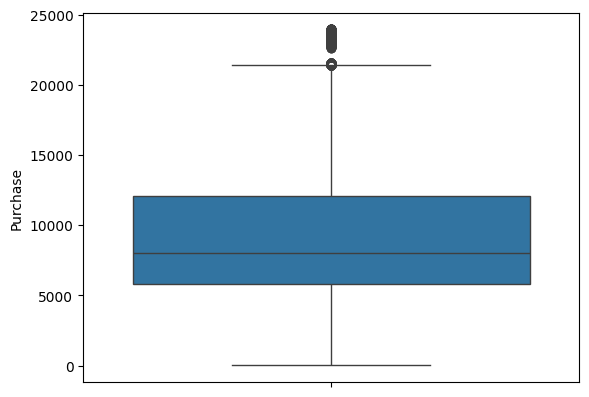

In [ ]:
# purchase is the only continuous variable in the dataset
#finding outliers for purchase
sns.boxplot(y=df['Purchase'])




b.Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
fifth_percentile = np.percentile(df['Purchase'], 5)
Ninteyfifth_fifth_percentile = np.percentile(df['Purchase'], 95)

# Clipping the 'Purchase' values between 5 and 95 percentile
df['Purchase'] = df['Purchase'].clip(lower=fifth_percentile, upper=Ninteyfifth_fifth_percentile)
df['Purchase']

0          8370
1         15200
2          1984
3          1984
4          7969
          ...  
550063     1984
550064     1984
550065     1984
550066     1984
550067     1984
Name: Purchase, Length: 550068, dtype: int64

3. Data Exploration
What products are different age groups buying?

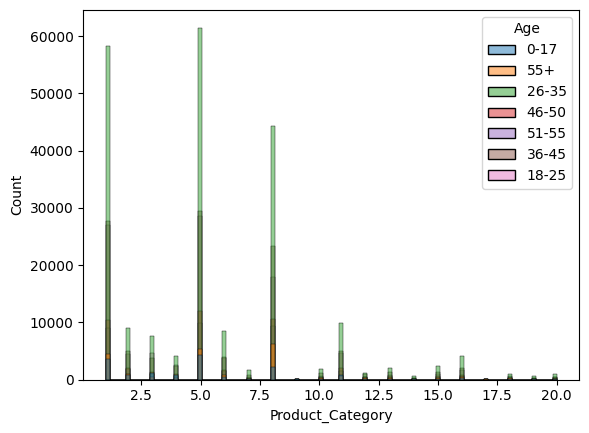

In [ ]:
sns.histplot(data=df, x='Product_Category', hue='Age')
plt.show()

b. Is there a relationship between age, marital status, and the amount spent?

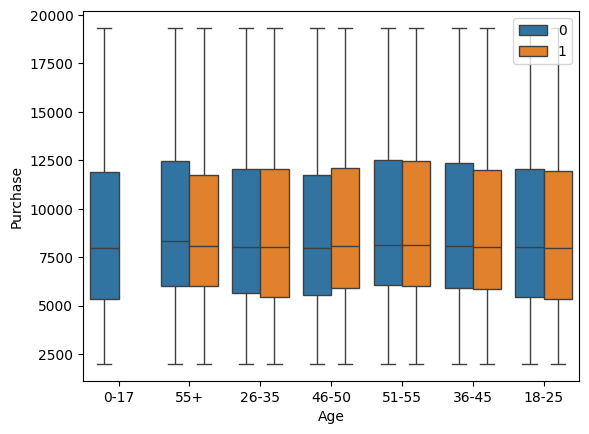

In [ ]:
sns.boxplot(x='Age', y='Purchase', hue='Marital_Status', data=df,)
plt.legend(loc ="upper right")
plt.show()

Are there preferred product categories for different genders?

<Axes: xlabel='Product_Category', ylabel='count'>

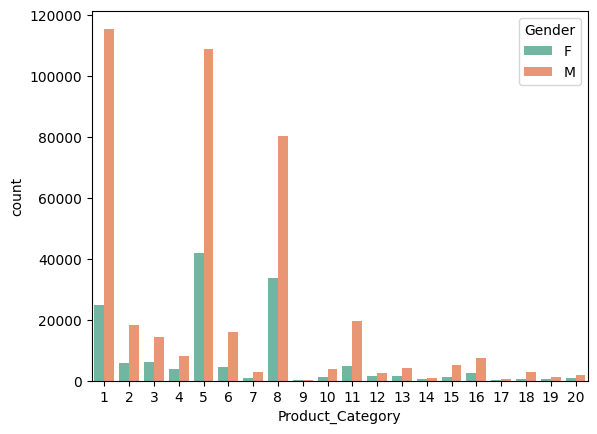

In [ ]:
sns.countplot(x='Product_Category', hue='Gender', data=df, palette='Set2')

4.How does gender affect the amount spent?

In [ ]:
from sklearn.utils import resample

# Bootstrapping function
def bootstrap(data, n_iterations=1000, confidence_level=0.95):
    means = []
    for i in range(n_iterations):
        sample = resample(data)
        means.append(np.mean(sample))
    lower = np.percentile(means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(means, (1 + confidence_level) / 2 * 100)
    return np.mean(data), lower, upper

In [ ]:
# Compute confidence intervals by gender
def compute_gender_confidence_intervals(df, sample_size=None, n_iterations=1000, confidence_level=0.95):
    results = {}
    for gender in df['Gender'].unique():
        if sample_size:
            data = df[df['Gender'] == gender].sample(n=sample_size, replace=True)['Purchase'].values
        else:
            data = df[df['Gender'] == gender]['Purchase'].values
        mean, lower, upper = bootstrap(data, n_iterations, confidence_level)
        results[gender] = (mean, lower, upper)
    return results

# Compute confidence intervals for the entire dataset
results_entire_dataset_gender = compute_gender_confidence_intervals(df)

# As our dataset is small, we will only compute for the entire dataset



In [ ]:
results_sample_300_gender = compute_gender_confidence_intervals(df, sample_size=300)
results_sample_300_gender

{'F': (8940.32, 8426.44975, 9467.154166666667),
 'M': (9070.873333333333, 8567.943083333334, 9636.308916666667)}

In [ ]:
results_sample_3000_gender = compute_gender_confidence_intervals(df, sample_size=3000)
results_sample_3000_gender

{'F': (8700.242333333334, 8518.579808333334, 8860.021991666667),
 'M': (9380.101333333334, 9212.617058333333, 9553.954416666666)}

In [ ]:
results_sample_30000_gender = compute_gender_confidence_intervals(df, sample_size=30000)
results_sample_30000_gender

{'F': (8712.055766666666, 8659.808772499999, 8766.8198825),
 'M': (9420.126833333334, 9364.1370575, 9480.043695833334)}

How does Marital_Status affect the amount spent?

In [ ]:
def Marital_Status_confidence_intervals(df, sample_size=None, n_iterations=1000, confidence_level=0.95):
    results = {}
    for Marital_Status in df['Marital_Status'].unique():
        if sample_size:
            data = df[df['Marital_Status'] == Marital_Status].sample(n=sample_size, replace=True)['Purchase'].values
        else:
            data = df[df['Marital_Status'] == Marital_Status]['Purchase'].values
        mean, lower, upper = bootstrap(data, n_iterations, confidence_level)
        results[Marital_Status] = (mean, lower, upper)
    return results

In [ ]:
results_sample_Marital_Status_Entire_Dataset = Marital_Status_confidence_intervals(df)
results_sample_Marital_Status_Entire_Dataset

{0: (9258.820463706883, 9241.523272493232, 9275.102453030353),
 1: (9253.669823420034, 9234.767532961741, 9273.376545352074)}

In [ ]:
results_sample_300_Marital_Status  = Marital_Status_confidence_intervals(df, sample_size=300)
results_sample_300_Marital_Status

{0: (9227.21, 8658.234833333334, 9742.490333333333),
 1: (8997.353333333333, 8508.32825, 9576.18375)}

In [ ]:
results_sample_3000_Marital_Status= Marital_Status_confidence_intervals(df, sample_size=3000)
results_sample_3000_Marital_Status

{0: (9257.198666666667, 9081.628233333335, 9425.714766666666),
 1: (9218.524, 9043.619191666667, 9402.399916666667)}

In [ ]:
results_sample_30000_Marital_Status = Marital_Status_confidence_intervals(df, sample_size=30000)
results_sample_30000_Marital_Status

{0: (9229.890333333333, 9176.825561666667, 9287.712113333333),
 1: (9238.983333333334, 9184.073324166666, 9298.042656666667)}

6. How does Age affect the amount spent?

In [ ]:
def Age_confidence_intervals(df, sample_size=None, n_iterations=1000, confidence_level=0.95):
    results = {}
    for Age in df['Age'].unique():
        if sample_size:
            data = df[df['Age'] == Age].sample(n=sample_size, replace=True)['Purchase'].values
        else:
            data = df[df['Age'] == Age]['Purchase'].values
        mean, lower, upper = bootstrap(data, n_iterations, confidence_level)
        results[Age] = (mean, lower, upper)
    return results

In [ ]:
results_sample_Entire_dataset_Age = Age_confidence_intervals(df)
results_sample_Entire_dataset_Age

{'0-17': (8940.64905310555, 8860.307361607734, 9013.466423321415),
 '55+': (9327.796549479166, 9270.661808268229, 9391.61019345238),
 '26-35': (9243.780119041656, 9223.303150232026, 9264.648908974576),
 '46-50': (9204.211483337345, 9159.61525240148, 9247.178176626332),
 '51-55': (9514.863250305187, 9461.75586932807, 9560.866563206151),
 '36-45': (9322.92190922891, 9296.67143087635, 9351.605434130512),
 '18-25': (9169.010977322898, 9140.05250953241, 9199.53657109171)}

In [ ]:
results_sample_300_Age = Age_confidence_intervals(df, sample_size=300)
results_sample_300_Age

{'0-17': (8994.243333333334, 8459.137916666667, 9541.374833333333),
 '55+': (9307.753333333334, 8794.427083333334, 9852.798083333333),
 '26-35': (9388.063333333334, 8859.83225, 9921.565999999999),
 '46-50': (9263.22, 8718.976583333333, 9825.10125),
 '51-55': (9596.663333333334, 9101.046083333335, 10223.114666666666),
 '36-45': (8882.186666666666, 8334.469416666667, 9428.327500000001),
 '18-25': (9622.096666666666, 9059.102333333332, 10169.57825)}

In [ ]:
results_sample_3000_Age = Age_confidence_intervals(df, sample_size=3000)
results_sample_3000_Age

{'0-17': (9009.743666666667, 8843.855375, 9188.771141666666),
 '55+': (9338.642666666667, 9181.164875, 9519.952791666667),
 '26-35': (9263.653, 9099.101075, 9449.8699),
 '46-50': (9335.940333333334, 9172.932016666668, 9501.367375),
 '51-55': (9654.121333333333, 9486.398458333335, 9830.719475),
 '36-45': (9224.727666666668, 9064.53085, 9401.264233333333),
 '18-25': (9160.115333333333, 8973.718016666668, 9326.736125000001)}

In [ ]:
results_sample_30000_Age = Age_confidence_intervals(df, sample_size=30000)
results_sample_30000_Age

{'0-17': (8956.9528, 8903.334283333332, 9013.374614166665),
 '55+': (9292.255, 9239.617605833333, 9344.942295833334),
 '26-35': (9205.411766666666, 9151.328183333333, 9262.132740833333),
 '46-50': (9186.5466, 9136.334074999999, 9233.8504925),
 '51-55': (9448.114, 9393.84711, 9502.081168333334),
 '36-45': (9326.731933333333, 9272.604703333333, 9383.015951666668),
 '18-25': (9135.4684, 9082.0215525, 9191.927003333332)}

7. Create a report


a. Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?

In [ ]:
# To find this we do a Hypothesis testing on purshase done by male and female and find is there a signicant difference in their average amount spent on the above CLT calcuated
Purchase_female = results_entire_dataset_gender['F']
Purchase_male = results_entire_dataset_gender['M']
t_stat, p_value = stats.ttest_ind(Purchase_female, Purchase_male)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -43.411845314439816
P-value: 1.6833852649154124e-06


In [ ]:
 #Determine if we reject or fail to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average spending between males and females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average spending between males and females.")

Reject the null hypothesis: There is a significant difference in average spending between males and females.


 Based on above analyis we can conclude  there is a significant difference, Walmart could use this insight to develop targeted marketing campaigns to cater to the differing spending behaviors of males and females.

B.Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

In [ ]:
amount_spent_by_Unmarried_people = results_sample_Marital_Status_Entire_Dataset[0]
amount_spent_by_Married_people = results_sample_Marital_Status_Entire_Dataset[1]
t_stat, p_value = stats.ttest_ind(amount_spent_by_Unmarried_people,amount_spent_by_Married_people)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.3076018133203413
P-value: 0.7737361266118719


In [ ]:
if p_value < alpha:
    print("Reject the null hypothesis: overlap or difference in average spending between married and unmarried individuals.")
else:
    print("Fail to reject the null hypothesis:overlap or difference in average spending between married and unmarried individuals.")

Fail to reject the null hypothesis:overlap or difference in average spending between married and unmarried individuals.


Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

In [ ]:
results_sample_Entire_dataset_Age

{'0-17': (8940.64905310555, 8860.307361607734, 9013.466423321415),
 '55+': (9327.796549479166, 9270.661808268229, 9391.61019345238),
 '26-35': (9243.780119041656, 9223.303150232026, 9264.648908974576),
 '46-50': (9204.211483337345, 9159.61525240148, 9247.178176626332),
 '51-55': (9514.863250305187, 9461.75586932807, 9560.866563206151),
 '36-45': (9322.92190922891, 9296.67143087635, 9351.605434130512),
 '18-25': (9169.010977322898, 9140.05250953241, 9199.53657109171)}

In [ ]:
Age_group_0_to_17 = results_sample_Entire_dataset['0-17']
Age_group_18_to_25 = results_sample_Entire_dataset['18-25']
Age_group_26_to_35 = results_sample_Entire_dataset['26-35']
Age_group_46_to_50 = results_sample_Entire_dataset['46-50']
Age_group_55_Plus = results_sample_Entire_dataset['46-50']
f_oneway(Age_group_0_to_17,Age_group_18_to_25,Age_group_26_to_35,Age_group_46_to_50,Age_group_55_Plus)


F_onewayResult(statistic=20.515342438988494, pvalue=8.251968520677007e-05)

In [ ]:
if p_value < alpha:
  print("Reject the null hypothesis: overlap or difference in average spending between various age groups")
else:
    print("Fail to reject the null hypothesis:overlap or difference in average spending between spending between various age groups")

Fail to reject the null hypothesis:overlap or difference in average spending between spending between various age groups


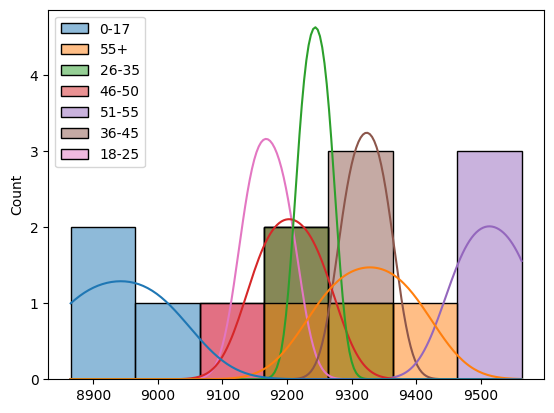

In [ ]:
sns.histplot(results_sample_Entire_dataset, kde = True)
plt.show()

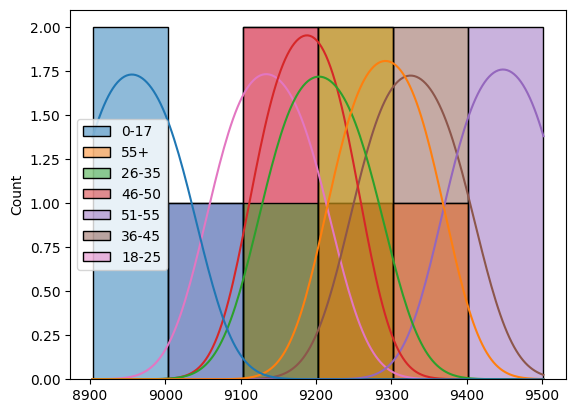

In [ ]:
sns.histplot(results_sample_3000_Age, kde = True)
plt.show()